In [1]:
%matplotlib notebook
%pylab
from scipy.fft import fft, ifft

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
N=64;sig=0.1

#functions
def a(t):
    return((1/(sig*sqrt(2*pi)))*(exp((-0.5*(t**2))/sig**2)))
def x(t):
    return(1+0.05*cos(16*t))*cos(2*t)

#computing tl
tl=zeros(N)
for l in range(N):
    tl[l]=-pi + ((2*pi*l)/N)

#compute the DFTs of a and x
acap=fft(a(tl))
xcap=fft(x(tl))

#Obtain bcap
bcap=[]
for m in range(N):
    bcap.append(acap[m]*xcap[m])
    
#Compute the inverse
bf=real(ifft(bcap))
print('b=',bf)


b= [ 1.01301958e+01  9.80119038e+00  9.08935564e+00  8.27648067e+00
  7.16313018e+00  5.58449569e+00  3.76493438e+00  1.90352083e+00
  2.34734160e-15 -1.90352083e+00 -3.76493438e+00 -5.58449569e+00
 -7.16313018e+00 -8.27648067e+00 -9.08935564e+00 -9.80119038e+00
 -1.01301958e+01 -9.80119038e+00 -9.08935564e+00 -8.27648067e+00
 -7.16313018e+00 -5.58449569e+00 -3.76493438e+00 -1.90352083e+00
 -1.63218254e-15  1.90352083e+00  3.76493438e+00  5.58449569e+00
  7.16313018e+00  8.27648067e+00  9.08935564e+00  9.80119038e+00
  1.01301958e+01  9.80119038e+00  9.08935564e+00  8.27648067e+00
  7.16313018e+00  5.58449569e+00  3.76493438e+00  1.90352083e+00
 -1.97631958e-15 -1.90352083e+00 -3.76493438e+00 -5.58449569e+00
 -7.16313018e+00 -8.27648067e+00 -9.08935564e+00 -9.80119038e+00
 -1.01301958e+01 -9.80119038e+00 -9.08935564e+00 -8.27648067e+00
 -7.16313018e+00 -5.58449569e+00 -3.76493438e+00 -1.90352083e+00
  7.75279768e-16  1.90352083e+00  3.76493438e+00  5.58449569e+00
  7.16313018e+00  8.27

In [3]:
from scipy.linalg import circulant
#computing the first column of A
an=a(tl)
#computing A
A=circulant(an)

N=64;tj=tl ;xj=x(tl)

#computing x
xt=transpose(xj)
#computing b
bc=matmul(A,xt)
print('b=',bc)

b= [ 1.01301958e+01  9.80119038e+00  9.08935564e+00  8.27648067e+00
  7.16313018e+00  5.58449569e+00  3.76493438e+00  1.90352083e+00
  2.42737153e-15 -1.90352083e+00 -3.76493438e+00 -5.58449569e+00
 -7.16313018e+00 -8.27648067e+00 -9.08935564e+00 -9.80119038e+00
 -1.01301958e+01 -9.80119038e+00 -9.08935564e+00 -8.27648067e+00
 -7.16313018e+00 -5.58449569e+00 -3.76493438e+00 -1.90352083e+00
 -1.87963086e-15  1.90352083e+00  3.76493438e+00  5.58449569e+00
  7.16313018e+00  8.27648067e+00  9.08935564e+00  9.80119038e+00
  1.01301958e+01  9.80119038e+00  9.08935564e+00  8.27648067e+00
  7.16313018e+00  5.58449569e+00  3.76493438e+00  1.90352083e+00
 -1.76670808e-15 -1.90352083e+00 -3.76493438e+00 -5.58449569e+00
 -7.16313018e+00 -8.27648067e+00 -9.08935564e+00 -9.80119038e+00
 -1.01301958e+01 -9.80119038e+00 -9.08935564e+00 -8.27648067e+00
 -7.16313018e+00 -5.58449569e+00 -3.76493438e+00 -1.90352083e+00
  5.78684034e-16  1.90352083e+00  3.76493438e+00  5.58449569e+00
  7.16313018e+00  8.27

In [4]:
#Scaling
#Using fft
scale=2*pi/N
bnf=scale*bf

#Using (6)
scale=2*pi/N
bnc=scale*bc

<IPython.core.display.Javascript object>


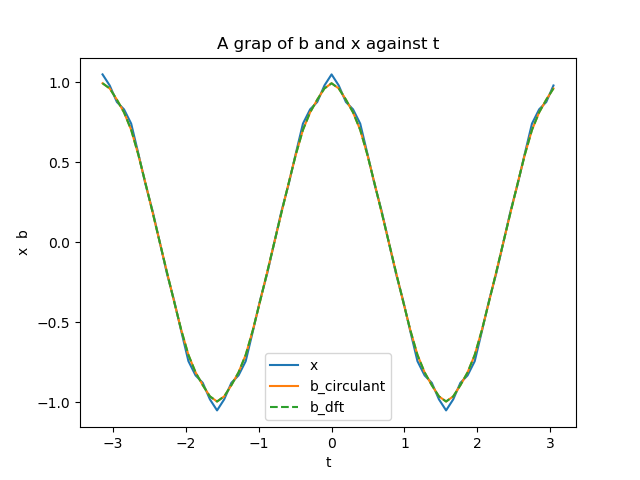

In [5]:
#ploting
figure(5)
plot(tj,xj,label='x')
plot(tj,bnc,label='b_circulant')
plot(tj,bnf,'--',label='b_dft')
title('A grap of b and x against t')
xlabel('t')
ylabel('x '' b')
legend()

show()